# UICer: Unbalanced Interaction Caller

We implemented the calling of unbalanced interactions in the Python script `UICer.py`. The script performs the following processing steps:

1. **Randomization:** If no P-value threshold is specified, then a threshold is determined using randomization so that the FDR remains below 5%.
2. **Calling of unbalanced interactions:** All interactions that do not have enough read pairs to achieve a significant test result at the chosen P-threshold are discarded. The remaining interactions that achieve a significant test result are classified as unbalanced and all others as balanced.
3. **Selection of comparison sets:** From the unbalanced and balanced interactions, two comparison sets are selected that are as large as possible and comparable with respect to their total read pair counts per interaction.

The script can be executed as follows:

[INFO] Input parameters
	[INFO] --out-prefix: DEMO_1
	[INFO] --description-tag: DEMO 1
	[INFO] --diachromatic-interaction-file:
		[INFO] ../../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
	[INFO] --min-inter-dist: 20,000
	[INFO] --read-pair-counts-rule: ht
	[INFO] --p-value-threshold: None
	[INFO] --random-seed-shuff-inter: 1
		[INFO] Will determine a P-value threshold so that the FDR is kept below: 0.05
		[INFO] --fdr-threshold: 0.05000
		[INFO] --nominal-alpha-max: 0.02500
		[INFO] --nominal-alpha-step: 0.00001
		[INFO] --iter-num: 100
		[INFO] --random-seed: 0
		[INFO] --thread-num: 2
		[INFO] Use '--fdr-threshold' to set your own FDR threshold.
		[INFO] Or use '--p-value-threshold' to skip the FDR procedure.

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
	[INFO] Set size: 64,000
[INFO] ... done.

[INFO] Shuffling dictionary with interactions ...
	[INFO] Random seed: 1
[IN

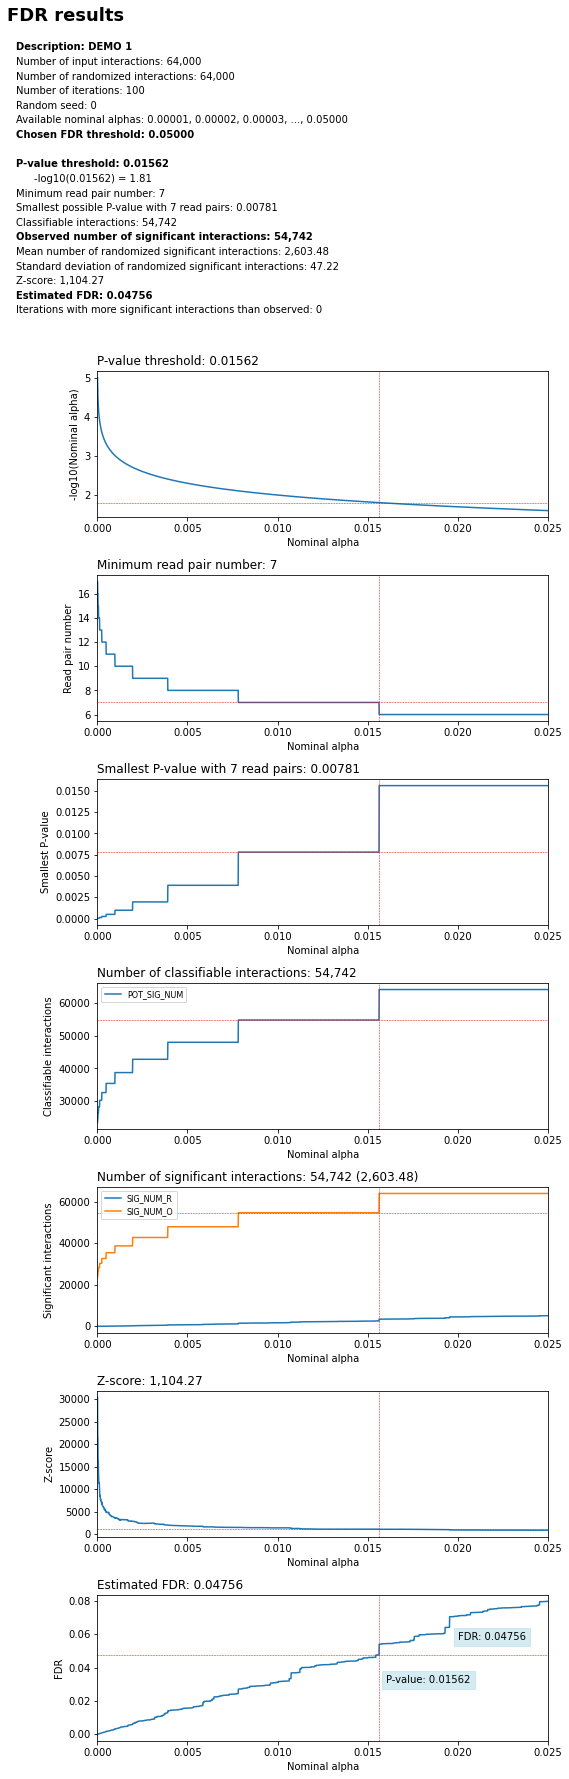

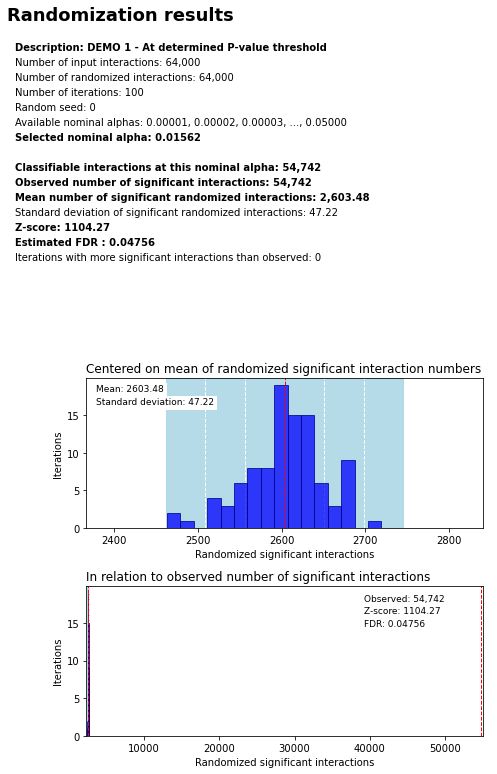

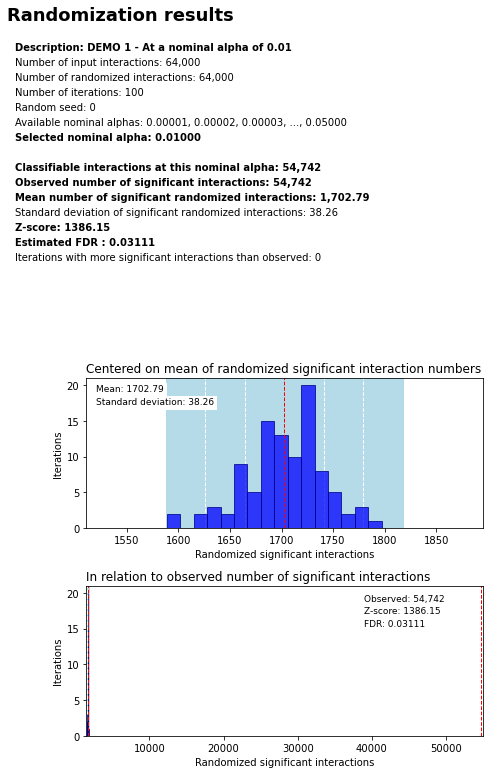

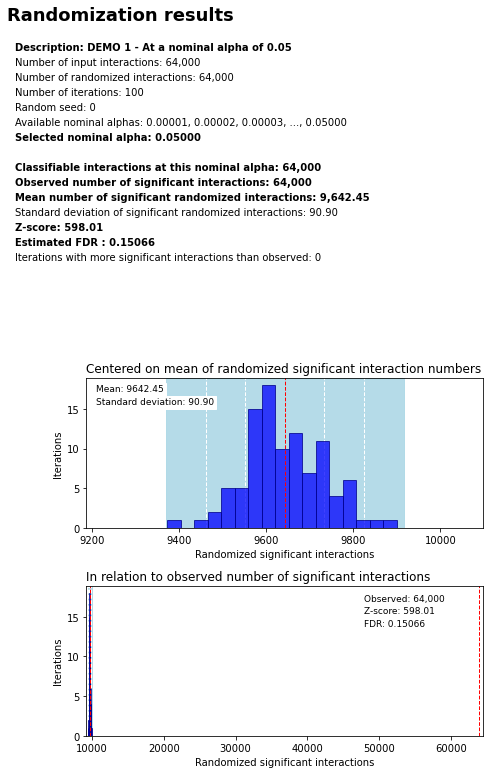

In [1]:
%run ../../UICer.py \
--out-prefix DEMO_1 \
--description-tag "DEMO 1" \
--diachromatic-interaction-file ../../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz \
--min-inter-dist 20000 \
--read-pair-counts-rule ht \
--fdr-threshold 0.05 \
--nominal-alpha-max 0.02500 \
--nominal-alpha-step 0.00001 \
--iter-num 100 \
--random-seed 0 \
--thread-num 2

## Command line arguments

| Argument | Meaning |
| :--- | :--- |
| `--out-prefix <String>` | Common prefix for all generated files, which can also include a path. |
| `--description-tag <String>` | Short description tag that appears in generated tables and plots. |
| `--diachromatic-interaction-file <String>` | Path to an input file in diachromatic interaction format. |
| `--min-inter-dist <Integer>` | Minimum interaction distance. |
| `--read-pair-counts-rule <String>` | Rule by which interactions are scored.<br>By default, the sum of the two highest counts is compared against<br>the sum of the two lowest counts using a binomial test (`ht`).<br>Alternatively, the sum of counts for type 0 and type 1 read pairs can be compared against<br>the sum of type 2 and type 3 read pairs (`st`).<br>In both cases, the score is the P-value from the binomial test. |
| `--fdr-threshold <Float>` | By default, the P-value threshold is chosen using randomization so that the estimated FDR remains below this threshold. |
| `--nominal-alpha-max <Float>` | Maximum P-value threshold for which it is checked whether the FDR remains below the specified FDR threshold. |
| `--nominal-alpha-step <Float>` | Step size for checked P-value thresholds. |
| `--iter-num <Integer>` | Number of randomization iterations. |
| `--random-seed <Integer>` | Random seed that is used for the first iteration. The random seed is incremented by ``1`` for each further iteration. |
| `--thread-num <Integer>` | Number of processes within which the iterations are performed in batches of the same size. |
| `--p-value-threshold <Float>` | By default, the P-value threshold is determined via randomizations. If a P-value threshold is specified,<br>then this threshold will be used for classification and no randomizations will be performed. |

## Generated files

The following files are generated:

- ``DEMO_1_reports.txt``
- ``DEMO_1_randomization_plot.pdf``
- ``DEMO_1_randomization_table.txt``
- ``DEMO_1_randomization_histogram_at_threshold.pdf``
- ``DEMO_1_randomization_histogram_at_001.pdf``
- ``DEMO_1_randomization_histogram_at_005.pdf``
- ``DEMO_1_evaluated_and_categorized_interactions.tsv.gz``

The content of these files is described below.

### ``DEMO_1_reports.txt``

This file contains a report on each individual processing step.

In [2]:
cat DEMO_1_reports.txt

[INFO] Input parameters
	[INFO] --out-prefix: DEMO_1
	[INFO] --description-tag: DEMO 1
	[INFO] --diachromatic-interaction-file:
		[INFO] ../../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
	[INFO] --min-inter-dist: 20,000
	[INFO] --read-pair-counts-rule: ht
	[INFO] --p-value-threshold: None
	[INFO] --random-seed-shuff-inter: 1
		[INFO] Will determine a P-value threshold so that the FDR is kept below: 0.05
		[INFO] --fdr-threshold: 0.05000
		[INFO] --nominal-alpha-max: 0.02500
		[INFO] --nominal-alpha-step: 0.00001
		[INFO] --iter-num: 100
		[INFO] --random-seed: 0
		[INFO] --thread-num: 2
		[INFO] Use '--fdr-threshold' to set your own FDR threshold.
		[INFO] Or use '--p-value-threshold' to skip the FDR procedure.

[INFO] Report on reading files:
	[INFO] Read interaction data from 1 files:
		[INFO] 64,000 interactions from: 
			[INFO] ../../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
			[INFO] Minimum number of read pairs: 6
			[INFO] Sk

The file contains tab-delimited lines containing results of the different processing steps, which can be extracted using appropriate tags. For example, the following command can be used to extract the rows with the results of the randomizations:

In [44]:
cat DEMO_1_reports.txt | grep ':TR_RANDOM:'

:TR_RANDOM:	DESCRIPTION	INPUT_I_NUM	ITER_NUM	RANDOM_SEED	NOMINAL_ALPHA	POT_SIG_NUM	SIG_NUM_O	SIG_NUM_R_MEAN	SIG_NUM_R_SD	Z_SCORE	FDR	SIG_NUM_R_GT_OBS
:TR_RANDOM:	DEMO_1	64000	100	0	0.01000	54742	54742	1702.79	38.26	1386.15	0.03111	0
:TR_RANDOM:	DEMO_1	64000	100	0	0.01562	54742	54742	2603.48	47.22	1104.27	0.04756	0
:TR_RANDOM:	DEMO_1	64000	100	0	0.05000	64000	64000	9642.45	90.90	598.01	0.15066	0


There are 4 rows for the randomization step: a header row, a row for the P-value threshold determined at an FDR of 5% and two rows for the P-value thresholds `0.05` and `0.01` (`NOMINAL_ALPHA`).

| Column name | Content |
| :--- | :--- |
| `N_PROCESSED` | Number of interactions in the input file. |
| `ITER_NUM` | Number of iterations performed for the randomization step. |
| `RANDOM_SEED` | Random seed that was set when the script was executed. |
| ``NOMINAL_ALPHA`` | P-value threshold. |
| `POT_SIG_NUM` | Number of interactions that have a sufficient number of read pairs to achieve a significant test result<br>at the respective P-value threshold. |
| `SIG_NUM_O` | Number of interactions that achieve a significant test result<br>at the respective P-value threshold. |
| `SIG_NUM_R_MEAN` | Mean number of randomized interactions that achieve a significant test result<br>at the respective P-value threshold. |
| `SIG_NUM_R_SD` | Standard deviation of the number of randomized interactions that achieve a significant test result<br>at the respective P-value threshold. |
| `Z_SCORE` | Z-Score, which results from `(SIG_NUM_O - SIG_NUM_R_MEAN)/SIG_NUM_R_SD`. |
| `FDR` | False discovery rate, which results from `SIG_NUM_R_MEAN/SIG_NUM_O`. |
| `SIG_NUM_R_GT_OBS` | Number of iterations in which the number of significant randomized interactions was greater than originally observed. |

The following command can be used to extract the rows for the evaluation and categorization at the determined P-value threshold:

In [7]:
cat DEMO_1_reports.txt | grep ':TR_EVAL_CAT:'

:TR_EVAL_CAT:	DESCRIPTION	PVAL_THRESH	MIN_RP	MIN_RP_PVAL	N_PROCESSED	N_DISCARDED	N_UNDIRECTED	N_DIRECTED
:TR_EVAL_CAT:	DEMO_1	0.00674	8	0.00391	9648210	2693499	3805480	3149231


We discard interactions that do not have enough read pairs in order to be significant, i.e., that even the most extreme observations have a P-value that is above the selected threshold.

| Column name | Content |
| :--- | :--- |
| `PVAL_THRESH` | Selected P-value threshold. |
| `MIN_RP` | Minimum number of reads required for a significant result. |
| `MIN_RP_PVAL` | Smallest possible P-value that corresponds to<br>the minimum number of read pairs required for a significant test result. |
| ``N_PROCESSED`` | Number of interactions in the input file. |
| `N_DISCARDED` | Number of interactions that were discarded because they did not have enough read pairs<br>to achieve a significant test result at the selected P-value threshold. |
| `N_DIRECTED` | Number of unbalanced interactions. |
| `N_UNDIRECTED` | Number of balanced interactions. |

The following command can be used to extract the rows for the selection of reference interactions:

In [8]:
cat DEMO_1_reports.txt | grep ':TR_SELECT:'

:TR_SELECT:	DESCRIPTION	DIX_NN	DIX_NE	DIX_EN	DIX_EE	DIX_TOTAL	DI_NN	DI_NE	DI_EN	DI_EE	DI_TOTAL	UIR_NN	UIR_NE	UIR_EN	UIR_EE	UIR_TOTAL	UI_NN	UI_NE	UI_EN	UI_EE	UI_TOTAL
:TR_SELECT:	DEMO_1	11255	330459	334993	38146	714853	74902	1140075	1144367	75034	2434378	74902	1148222	1136220	75034	2434378	275550	514091	507035	74426	1371102


We select two equally sized comparison sets of unbalanced (`DI`) and balanced interactions (`UIR`) that are comparable in terms of their numbers of read pairs per interaction. We label unbalanced interactions that do not belong to the comparison set with `DIX` and balanced interactions with `UI`. When selecting reference interactions, we also take into account the enrichment status of digests (``E`` for enriched and ``N`` for not enriched). An interaction can have four different enrichment states: ``NN``,``NE``,``EN`` or ``EE``. For example, `DI_EN` and `UIR_EN` form two comparison sets of approximately the same size that are comparable with respect to their numbers of read pairs per interaction.

| Column name | Content |
| :--- | :--- |
| `DIX_NN` | Number of **unbalanced interactions** with enrichment status `NN`<br>that were **not selected** for the comparison set. |
| `DIX_NE` | Number of **unbalanced interactions** with enrichment status `NE`<br>that were **not selected** for the comparison set. |
| `...` | ... |
| `DI_EN` | Number of **unbalanced interactions** with enrichment status `EN`<br>that were selected for the comparison set. |
| `...` | ... |
| `UIR_EN` | Number of **balanced interactions** with enrichment status `EN`<br>that were selected for the comparison set. |
| `...` | ... |
| `UI_EE` | Number of **balanced interactions** with enrichment status `EE`<br>that were **not selected** for the comparison set. |
| `UI_TOTAL` | Sum of the numbers of **balanced interactions** with enrichment states `NN`, `NE`, `EN` and `EE`<br>that were **not selected** for the comparison set. |

### `DEMO_1_randomization_plot.pdf`

This file contains randomization plots for the selected range of nominal alphas:

`[1 * nominal-alpha-step, 2 * nominal-alpha-step, ..., nominal-alpha-max]`.

It consists of a header containing the input arguments and the results for the largest nominal alpha for which the FDR remains below 5% and seven plots.

1. **Decadic logarithm**  
Decadic logarithms of nominal alphas. Red dashed lines are shown for the largest nominal alpha with an estimated FDR below the chosen threshold. This nominal alpha is used as the P-value threshold. Interactions with a smaller P-value are classified as unbalanced.

2. **Minimum read pair number**  
Minimum number of read pairs required to produce a significant test result at a given nominal alpha. 

3. **Most extreme P-value with minimum numbers of read pairs**  
The smallest P-value possible given the minimum number of read pairs required to obtain a significant test result.

4. **Number of classifiable interactions**  
Number of interactions that have enough read pairs to produce a significant test result.

5. **Number of significant interactions**  
The numbers of observed significant interactions are shown in orange and the number of randomized significant interactions are shown in blue.

6. **Z Score**
The Z-scores are calculated from the actually observed number of significant interactions and the mean and standard deviation of the number of randomized significant interactions.

7. **Estimated FDR**
The estimated FDR is the ratio of the mean number of randomized interactions (across all iterations) and the observed number of significant interactions.

In [5]:
# If there are problems displaying the PDF file, use the Firefox browser
from IPython.display import IFrame
IFrame('./DEMO_1_randomization_plot.pdf', width=900, height=400)

### ``DEMO_1_randomization_table.txt``

This file contains a table with the values shown in ``DEMO_1_randomization_plot.pdf``.

In [39]:
!head -n 10 DEMO_1_randomization_table.txt

:TR_RANDOM:	DESCRIPTION	INPUT_I_NUM	ITER_NUM	RANDOM_SEED	NOMINAL_ALPHA	POT_SIG_NUM	SIG_NUM_O	SIG_NUM_R_MEAN	SIG_NUM_R_SD	Z_SCORE	FDR	SIG_NUM_R_GT_OBS
:TR_RANDOM:	DEMO_1	64000	100	0	0.00001	23607	23607	0.66	0.78	30364.52	0.00003	0
:TR_RANDOM:	DEMO_1	64000	100	0	0.00002	24992	24992	1.37	1.16	21483.86	0.00005	0
:TR_RANDOM:	DEMO_1	64000	100	0	0.00003	24992	24992	2.00	1.17	21428.75	0.00008	0
:TR_RANDOM:	DEMO_1	64000	100	0	0.00004	26577	26577	3.26	1.62	16441.17	0.00012	0
:TR_RANDOM:	DEMO_1	64000	100	0	0.00005	26577	26577	3.66	1.62	16403.30	0.00014	0
:TR_RANDOM:	DEMO_1	64000	100	0	0.00006	26577	26577	4.51	1.89	14063.85	0.00017	0
:TR_RANDOM:	DEMO_1	64000	100	0	0.00007	28315	28315	5.57	2.25	12578.74	0.00020	0
:TR_RANDOM:	DEMO_1	64000	100	0	0.00008	28315	28315	6.71	2.51	11290.93	0.00024	0
:TR_RANDOM:	DEMO_1	64000	100	0	0.00009	28315	28315	7.25	2.46	11492.13	0.00026	0


### ``DEMO_1_randomization_histogram_at_threshold.pdf``

This file contains two histograms for the total numbers of significant randomized interactions at the determined P-value threshold from all iterations. The first histogram is centered on the mean of the numbers of significant randomized interactions. The range of three standard deviations around the mean is highlighted in light blue. The second histogram shows the same data, but the distribution is shown along with the observed number of significant interactions.

In [3]:
from IPython.display import IFrame
IFrame("./DEMO_1_randomization_histogram_at_threshold.pdf", width=900, height=500)

### ``DEMO_1_randomization_histogram_at_001.pdf``

This file contains the two histograms for the number of significant randomized interactions at a nominal alpha of `0.01`.

In [4]:
from IPython.display import IFrame
IFrame("./DEMO_1_randomization_histogram_at_001.pdf", width=900, height=500)

### ``DEMO_1_randomization_histogram_at_005.pdf``

This file contains the two histograms for the number of significant randomized interactions at a nominal alpha of `0.05`.

In [42]:
from IPython.display import IFrame
IFrame("./DEMO_1_randomization_histogram_at_005.pdf", width=900, height=500)

### ``DEMO_1_evaluated_and_categorized_interactions.tsv.gz``

This file contains the interactions with associated P-values and labels. The format corresponds to the Dichromatic interaction format with two additional columns. The P-values are given as negative decadic logarithm. The interactions have the following labels:

1. `DIX`: Unbalanced interactions that are not part of the comparison set.
2. `DI`: Unbalanced interactions that are part of the comparison set.
3. `UIR`: Balanced interactions that are  part of the comparison set.
4. `UI`: Balanced interactions that are not part of the comparison set.


In [6]:
!gunzip DEMO_1_evaluated_and_categorized_interactions.tsv.gz
!head -n 100 DEMO_1_evaluated_and_categorized_interactions.tsv
!gzip DEMO_1_evaluated_and_categorized_interactions.tsv

chr7	137924541	137925718	N	chr7	139031116	139037921	E	3:0:4:0	2.11	DIX
chr1	204278990	204280162	N	chr1	204314690	204314802	N	3:0:5:0	2.41	DIX
chr2	215266235	215267672	N	chr2	216034096	216035171	E	6:0:5:0	3.31	DIX
chr1	50137359	50138436	N	chr1	50222036	50239239	E	33:0:24:0	17.16	DIX
chr17	35979931	35982415	E	chr17	36104576	36105878	N	11:0:7:0	5.42	DIX
chr11	94686027	94689521	N	chr11	95232166	95237506	E	6:0:2:0	2.41	DIX
chr6	128520058	128523763	E	chr6	128560661	128565389	N	70:0:61:0	39.43	DIX
chr1	69749436	69751057	N	chr1	71399596	71413988	E	4:0:4:0	2.41	DIX
chr6	146596833	146600476	E	chr6	146964005	146965553	N	7:0:3:0	3.01	DIX
chr17	46189955	46203695	E	chr17	46715870	46720481	N	6:0:9:0	4.52	DIX
chr15	65576192	65579010	N	chr15	66495323	66499293	E	22:0:17:0	11.74	DIX
chr4	69524896	69531576	E	chr4	69993083	69995977	E	7:0:9:0	4.82	DIX
chr7	140573789	140581539	E	chr7	140791200	140793607	N	9:0:11:0	6.02	DIX
chr4	162583952	162584164	N	chr4	163107739	163109103	E	15:0:18:0	9.93	DIX
chr14	3199446